### Simulación

In [69]:
import moderngl
import numpy as np
import matplotlib.pyplot as plt

# Crea el contexto y el compute shader
ctx = moderngl.create_context(standalone=True)

compute = ctx.compute_shader(open("../src/shader/simular.glsl").read())

# Estados iniciales
estados = np.zeros((32, 32), dtype=np.int32)
estados[16, 0] = 1

# Genera los buffers para la simulación
buf_a = ctx.buffer(estados.tobytes())
buf_a.bind_to_storage_buffer(0)
buf_b = ctx.buffer(estados.tobytes())
buf_b.bind_to_storage_buffer(1)

# Ejecuta un paso en la simulación
def paso():
    global buf_a, buf_b
    buf_a.bind_to_storage_buffer(0)
    buf_b.bind_to_storage_buffer(1)

    compute.run(group_x=1, group_y=1)
    ctx.memory_barrier(moderngl.SHADER_STORAGE_BARRIER_BIT)
    buf_a, buf_b = buf_b, buf_a

#### Ejecución de paso a paso

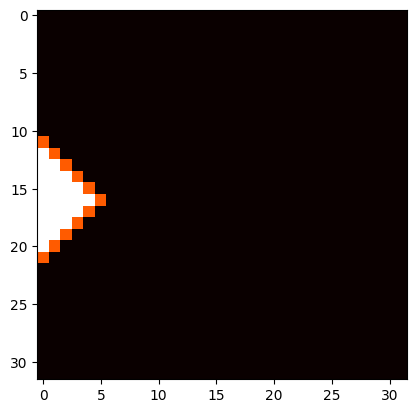

In [74]:
# Ejecuta un paso y muestra los resultados
paso()

result_a = np.frombuffer(buf_a.read(), dtype=np.int32)

plt.imshow(np.reshape(result_a, [32, -1]), vmin=0, vmax=2, interpolation='none', cmap="hot")